##### Для выхода на инвестиционный рынок и возможностью дальнейшей покупки, развития и перепродажи перспективных стартапов необходимо осуществлить углублённый анализ исторических данных, направленный на выработку обоснованных рекомендаций по выбору оптимальной бизнес‑модели для финансовой компании‑заказчика

##### Описание данных

- `startup_acq.csv` — датасет, содержащий сведения о сделках по приобретению одних компаний другими;
- `startup_fin.csv` — датасет с комплексной информацией о компаниях и параметрах их финансирования (раунды, суммы, статусы, вехи);
- `employee_ed.csv` — датасет, отражающий образование сотрудников (учебные заведения и даты выпуска);
- `employee_profiles.csv` — датасет с базовыми персональными данными сотрудников и их привязкой к компаниям;
- `employee_degrees.csv` — датасет, описывающий уровни и специализации образования сотрудников

##### Структура работы

1. Предобработка данных: загрузка и преобразование
2. Выборочное исследование по запросу компании-заказчика
3. Исследовательский анализ данных объединенного датасета
4. Итоговый вывод и рекомендации

---

##### 1. Предобработка данных: загрузка и преобразование
    1.1 Вывод общей информации, первичное знакомство с исходными данными

In [1]:
# базовые библиотеки для обработки данных
import pandas as pd
import numpy as np

# библиотеки для визуализации данных
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# визуализации и анализ пропущенных значений в данных
import missingno as msno

# библиотека для форматирования текста
from IPython.display import Markdown, display

Познакомимся с данными датасета `startup_acq.csv` — выведем первые строки и информацию о датафрейме:

In [4]:
startup_acq_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [5]:
startup_acq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датасет `startup_acq.csv` содержит 6 столбцов и 9407 строк, в которых представлена информация о сделках по поглощению компаний

Описание представлено столбцами - идентификаторы покупки, покупающей и покупаемой компаний, варианты расчета, сумма и дата сделки

После первичного анализа данных можно сделать следующие выводы:
- названия столбцов приведены к snake case;
- представленные данные содержат как числовые значения (int64), так и строковые (object);
- столбец `term_code` имеет значительное количество пропусков (содержит только 1831 непустое значение из 9407);
- в столбце `acquired_at` также есть пропуски

Датасет требует дополнительной обработки, особенно в части обработки пропусков в столбцах `term_code` и `acquired_at`

Теперь с данными датасета `startup_fin.csv` — выведем первые строки и информацию о датафрейме:

In [6]:
startup_fin_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
startup_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датасет `startup_fin.csv` содержит 22 столбца и 217774 строки с информацией о компаниях и их инвестиционном финансировании

Описание представлено столбцами: идентификатор компании, название, вид деятельности, статус, дата инвестирования, дата закрытия компании, сайт, ник компании в сети, код страны; число инвестиционных раундов, число раундов финансирования, сумма финансирования, вехи финансирования; идентификатор этапа финансирования, идентификатор компании, дата финансирования, тип финансирования, сумма финансирования, денежная оценка, участники. А также бинарные значения является ли раунд первым и последним

- в датафрейме присутствуют как числовые (float64) - 12 столбцов, так и строковые (object) - 10 столбцов данные;
- большинство числовых показателей (`investment rounds`, `funding rounds`, `funding total`, `milestones`) не имеют пропусков;
- значительное количество пропусков наблюдается в столбцах: `category code` (73888 пропусков), `founded at` (107818 пропусков), `closed at` (214325 пропусков), `network username` (121940 пропусков), `country code` (109167 пропусков);
- бинарные признаки (`is first round`, `is last round`) представлены в числовом формате (0/1)

Датасет требует существенной очистки данных, особенно в части обработки пропусков в столбцах с категориальной информацией и временными метками. Также стоит обратить внимание на дублирование информации и приведению названий столбцов к snake case:

Обратим особое внимание на столбцы `company  ID` и `company  id` - они имеют одинаковые названия, проверим насколько они совпадают (сопроводим визуализацией), а после преобразуем

In [8]:
first_id = set(startup_fin_df['company  ID'].dropna().unique())
second_id = set(startup_fin_df['company  id'].dropna().unique())

# пересечения на основании схемы
intersection = first_id.intersection(second_id)
only_first = first_id - second_id
only_second = second_id - first_id

print(f"уникальных в company_id - {len(only_first)}")
print(f"уникальных в company_id_round - {len(only_second)}")
print(f"пересечений в результатах - {len(intersection)}")
print(f"процент совпадений - {len(intersection)/(len(first_id) + len(second_id) - len(intersection))*100:.2f}%")

уникальных в company_id - 164846
уникальных в company_id_round - 232
пересечений в результатах - 31707
процент совпадений - 16.11%


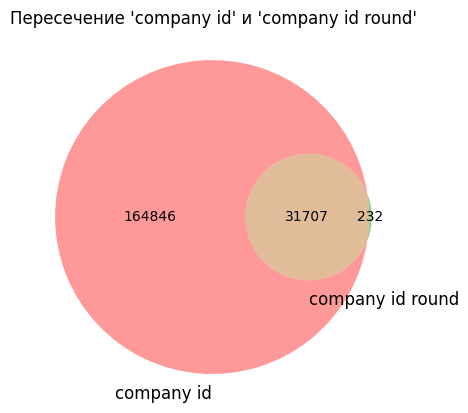

In [9]:
#строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company id', 'company id round'))

# настраиваем отображение графика
plt.title("Пересечение 'company id' и 'company id round'")
plt.show()

Набор `company id` содержит значительно больше уникальных значений 164846 записей, пересечение наборов показывает наличие 31707 общих ID (16%)

In [10]:
# создаем копию датафрейма
startup_fin_df_copy = startup_fin_df.copy()

# подсчитываем несовпадения
initial_mismatches = (startup_fin_df_copy['company  ID'] != startup_fin_df_copy['company  id']).sum()

# подсчитываем NaN
initial_na = startup_fin_df_copy['company  ID'].isna().sum()

# проверяем уникальность значений
initial_unique_ID = startup_fin_df_copy['company  ID'].nunique()
initial_unique_id = startup_fin_df_copy['company  id'].nunique()

# начальное состояние данных
print("До изменений:")
print(f"несовпадений в 'company  ID' - {initial_mismatches}")
print(f"NaN в 'company  ID' - {initial_na}")
print(f"уникальных значений в 'company  ID' - {initial_unique_ID}")
print(f"уникальных значений в 'company  id' - {initial_unique_id}")

# строки с NaN в 'company  ID'
nan_rows = startup_fin_df_copy['company  ID'].isna()

# заполняем NaN в 'company  ID' значениями из 'company  id'
startup_fin_df_copy.loc[nan_rows, 'company  ID'] = startup_fin_df_copy.loc[nan_rows, 'company  id']

# оставшиеся несовпадения
remaining_mismatches = (startup_fin_df_copy['company  ID'] != startup_fin_df_copy['company  id']).sum()

# количество NaN в 'company  ID'
remaining_na = startup_fin_df_copy['company  ID'].isna().sum()

# уникальность значений после изменений
unique_company_ID = startup_fin_df_copy['company  ID'].nunique()
unique_company_id = startup_fin_df_copy['company  id'].nunique()

# результат
print("\nПосле изменений:")
print(f"оставшихся несовпадений - {remaining_mismatches}")
print(f"оставшихся NaN в 'company  ID' - {remaining_na}")
print(f"уникальных значений в 'company  ID' - {unique_company_ID}")
print(f"уникальных значений в 'company  id' - {unique_company_id}")

До изменений:
несовпадений в 'company  ID' - 165148
NaN в 'company  ID' - 302
уникальных значений в 'company  ID' - 196553
уникальных значений в 'company  id' - 31939

После изменений:
оставшихся несовпадений - 164846
оставшихся NaN в 'company  ID' - 0
уникальных значений в 'company  ID' - 196785
уникальных значений в 'company  id' - 31939


Визуально видим, что есть столбец id компаний, соответсвтующий раунду финансирования. Столбец `company id`, переименуем в `company_id_round`:

In [11]:
startup_fin_df = startup_fin_df.rename(columns={'company  id': 'company_id_round'})

In [12]:
startup_fin_df.columns = startup_fin_df.columns.str.strip().str.lower().str.replace('  ', '_')

In [13]:
display(startup_fin_df.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_round', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')

Переходим к датасету `employee_ed.csv`:

In [14]:
employee_ed_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [15]:
employee_ed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датасет `employee_ed.csv` содержит 5 столбцов и 226709 строк с информацией о людях и их профессиональной принадлежности

Описание столбцов содержит идентификаторы сотрудника и его компании, его имя и фамилию, а также ник в соц.сети

- в датафрейме присутствуют как числовые (int64, float64) - 2 столбца, так и строковые (object) - 3 столбца данные;
- столбец `id` единственный имеет полное заполнение и представлен целочисленными значениями;
- столбцы с именами (`first_name`, `last_name`) имеют минимальное количество пропусков - 9 и 4 соответственно;
- значительное количество пропусков наблюдается в столбцах, связанных с компаниями: `company_id` (192094 пропусков), `network_username` (187842 пропусков);
- в данных присутствуют имена разного формата написания (например, “Dr. Steven”)

Датасет требует дополнительной обработки, особенно в части обработки пропусков. Также стоит обратить внимание на формат хранения и возможную необходимость его преобразования (в процессе работы)

В начало{#структура-работы}

Очередь познакомиться с данными датасета `employee_profiles.csv`:

In [16]:
employee_profiles_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [17]:
employee_profiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [18]:
# визуально видим грамматическую ошибку в названии столбца, поправим ее и проверим результат:
employee_profiles_df = employee_profiles_df.rename(columns={'instituition': 'institution'})
display(employee_profiles_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   institution   109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


None

Датасет `employee_profiles.csv` содержит 4 столбца и 109610 строк с информацией об образовании людей

Описание столбцов содержит: идентификаторы о работнике и его образовании, а также название учебного заведения и дату получения образования

- в датафрейме присутствуют как числовые (int64) - 2 столбца, так и строковые (object) - 2 столбца данные;
- столбцы `id` и `person_id` полностью заполнены и представлены целочисленными значениями;
- столбец `instituition` имеет небольшое количество пропусков (55 пропущенных значений);
- столбец `graduated_at` содержит значительное количество пропусков (51556 пропущенных значений)

На основании анализа можно заключить, что датасет требует дополнительной обработки, особенно в части обработки пропусков в столбце `graduated_at`. Также стоит обратить внимание на пропуски в столбце `instituition`, хотя их количество относительно невелико

И наконец изучим, данные заключительного датасета `employee_degrees.csv`:

In [19]:
employee_degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [20]:
employee_degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датасет `employee_degrees.csv` содержит 4 столбца и 109610 строк с информацией об академических степенях и специальностях

Данный датасет содержит столбцы идентификаторы записи и сотрудника, тип его образования и полученная специальность

- в датафрейме присутствуют как числовые (int64) - 1 столбец, так и строковые (object) - 3 столбца данные;
- столбец `id` не имеет пропусков и представлен целочисленными значениями;
- столбец `object_id` также полностью заполнен, содержит строковые значения с префиксом ‘p:’;
- значительное количество пропусков наблюдается в столбцах с категориальной информацией: `degree_type` (11221 пропущенное значение), `subject` (28312 пропущенных значения)

Датасет требует дополнительной обработки, особенно в части обработки пропусков в столбцах `degree_type` и `subject`. Также стоит обратить внимание на формат хранения `object_id` (наличие префикса ‘p:’) и возможность его преобразования для более удобного использования

    1.2 Смена типов и анализ пропусков

Выполним преобразование типов данных в столбцах и оценим их полноту

Преобразуем данные полей датафрейма `startup_acq_df` и сразу проверяем результат:

In [21]:
# преобразуем дату
startup_acq_df['acquired_at'] = pd.to_datetime(startup_acq_df['acquired_at'])

# ID в строки
id_columns = ['id', 'acquiring_company_id', 'acquired_company_id']
for column in id_columns:
    startup_acq_df[column] = startup_acq_df[column].astype('string')

# price_amount оставляем int64 (из-за наличия нулевых значений)

# term_code в категорию
term_codes = startup_acq_df['term_code'].dropna().unique()
startup_acq_df['term_code'] = startup_acq_df['term_code'].astype('category')

In [22]:
startup_acq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   string        
 1   acquiring_company_id  9407 non-null   string        
 2   acquired_company_id   9407 non-null   string        
 3   term_code             1831 non-null   category      
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(1), string(3)
memory usage: 376.9 KB


Преобразуем данные датасета `employee_ed.csv`:

In [23]:
# явным образом преобразуем строковые столбцы
string_columns = ['first_name', 'last_name', 'network_username']
for col in string_columns:
    employee_ed_df[col] = employee_ed_df[col].astype('string')

Также можем воспользоваться готовой функцией оптимизирующей типы данных. Она проверяет минимальное и максимальное значения в столбце и если значения могут уместиться в типе данных меньшего размера, то столбец конвертируется в более компактный тип данных. А для оценки подсчитывается размер занимаемой памяти DataFrame до и после оптимизации и выводит разницу в процентах

In [24]:
def optimize_memory_usage(df: pd.DataFrame, print_size: bool = True) -> pd.DataFrame:
    
    '''
    Функция оптимизирует использование памяти в датафрейме
    
    Параметры:
    df: pd.DataFrame - исходная таблица данных
    print_size: bool - показывать ли результаты оптимизации
    
    Возвращает:
    pd.DataFrame - оптимизированный датафрейм
    '''
    
    # Типы, которые будем проверять на оптимизацию
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']  # Типы, которые будем проверять на оптимизацию
    
    # Размер занимаемой памяти до оптимизации (в Мб)
    before_size = df.memory_usage().sum() / 1024**2
    
    for column in df.columns:
        column_type = df[column].dtypes
        
        if column_type in numerics:
            column_min = df[column].min()
            column_max = df[column].max()
            
            if str(column_type).startswith('int'):
                if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                    df[column] = df[column].astype(np.int8)
                elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
                elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)
            
            else:
                if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)
                else:
                    df[column] = df[column].astype(np.float64)
    
    # Размер занимаемой памяти после оптимизации (в Мб)
    after_size = df.memory_usage().sum() / 1024**2
    
    if print_size:
        print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
              .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
    
    return df

In [25]:
employee_ed_df = optimize_memory_usage(employee_ed_df)

Размер использования памяти: до  8.65 Mb - после  6.92 Mb (20.0%)


Столбцы `first_name` и `last_name` содержат меньше процента пропусков - очистим их и выполним последующую проверку результата:

In [26]:
employee_ed_df.dropna(subset=['first_name'])

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,<NA>
1,100,Peter,Lester,27.0,<NA>
2,1000,Dr. Steven,E. Saunders,292.0,<NA>
3,10000,Neil,Capel,2526.0,<NA>
4,100000,Sue,Pilsch,NaN,<NA>
...,...,...,...,...,...
226704,99999,Ramon,Peypoch,NaN,<NA>
226705,174088,Dr. Ray,Woods,188200.0,network
226706,118386,Ricardo,Durand,143419.0,itechsocialnet
226707,175827,mahesh,kumar,NaN,socialnethubs


In [27]:
employee_ed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int32  
 1   first_name        226700 non-null  string 
 2   last_name         226705 non-null  string 
 3   company_id        34615 non-null   float32
 4   network_username  38867 non-null   string 
dtypes: float32(1), int32(1), string(3)
memory usage: 6.9 MB


Оптимизируем данные датасета `employee_profiles.csv`:

In [28]:
# вызовем функцию оптимизации числовых столбцов
employee_profiles_df = optimize_memory_usage(employee_profiles_df)

Размер использования памяти: до  3.35 Mb - после  2.51 Mb (25.0%)


In [29]:
# оптимизация столбца с датами
employee_profiles_df['graduated_at'] = pd.to_datetime(employee_profiles_df['graduated_at'], errors='coerce')

# оптимизация текстовых столбцов
string_cols = employee_profiles_df.select_dtypes(include=['object']).columns
employee_profiles_df[string_cols] = employee_profiles_df[string_cols].astype('string')

In [30]:
# напишем функцию проверки наличия столбца в датафрейме, позже вызовем ее вновь:
def check_column_existence(column_name, 
                          dataframes_dict={
                              'startup_acq_df': startup_acq_df,
                              'startup_fin_df': startup_fin_df,
                              'employee_ed_df': employee_ed_df,
                              'employee_profiles_df': employee_profiles_df,
                              'employee_degrees_df': employee_degrees_df
                          }):

    found_in = []  # список для хранения названий датафреймов
    
    # перебираем все датафреймы в словаре
    for df_name, df in dataframes_dict.items():
        # проверяем наличие столбца
        if column_name in df.columns:
            found_in.append(df_name)
    
    return found_in

Удалим пропуски из поля `institution` и проверим результат:

In [31]:
employee_profiles_df = employee_profiles_df.dropna(subset=['institution'])

In [32]:
employee_profiles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109555 entries, 1 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109555 non-null  int32         
 1   person_id     109555 non-null  int32         
 2   institution   109555 non-null  string        
 3   graduated_at  58018 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(2), string(1)
memory usage: 3.3 MB


Переходим к датасету `employee_degrees_df.csv`, прежде всего поправим значения в столбце `object_id` - избавимся от префикса `p:` в значениях и вернем ему числовой тип данных:

In [33]:
employee_degrees_df['object_id'] = employee_degrees_df['object_id'].str.replace('p:', '')
employee_degrees_df['object_id'] = pd.to_numeric(employee_degrees_df['object_id'], downcast='integer')

Теперь оптимизируем тип данных и выводим результат на экран:

In [34]:
# вновь вызовем функцию оптимизации числовых столбцов
employee_degrees_df = optimize_memory_usage(employee_degrees_df)

Размер использования памяти: до  2.93 Mb - после  2.51 Mb (14.3%)


In [35]:
# также присваиваем категориальный тип явным образом
employee_degrees_df['degree_type'] = employee_degrees_df['degree_type'].astype('category')
employee_degrees_df['subject'] = employee_degrees_df['subject'].astype('string')

In [36]:
employee_degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   id           109610 non-null  int32   
 1   object_id    109610 non-null  int32   
 2   degree_type  98389 non-null   category
 3   subject      81298 non-null   string  
dtypes: category(1), int32(2), string(1)
memory usage: 2.2 MB


Осталось обработать данные самого объемного датасета `startup_fin.csv`, сохраним все данные в целости, сделаем проверку:

In [37]:
startup_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id           217472 non-null  float64
 1   name                 217471 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id_round     52928 non-null   float64
 15  funded_at        

In [38]:
# оптимизация числовых столбцов
startup_fin_df = optimize_memory_usage(startup_fin_df)

Размер использования памяти: до 36.55 Mb - после 26.58 Mb (27.3%)


In [39]:
# оптимизация datetime
startup_fin_df['founded_at'] = pd.to_datetime(startup_fin_df['founded_at'])
startup_fin_df['closed_at'] = pd.to_datetime(startup_fin_df['closed_at'])
startup_fin_df['funded_at'] = pd.to_datetime(startup_fin_df['funded_at'])

# оптимизация категориальных
startup_fin_df['status'] = startup_fin_df['status'].astype('category')
startup_fin_df['category_code'] = startup_fin_df['category_code'].astype('category')
startup_fin_df['country_code'] = startup_fin_df['country_code'].astype('category')
startup_fin_df['funding_round_type'] = startup_fin_df['funding_round_type'].astype('category')

# оптимизация строковых
startup_fin_df['name'] = startup_fin_df['name'].astype('string')
startup_fin_df['domain'] = startup_fin_df['domain'].astype('string')
startup_fin_df['network_username'] = startup_fin_df['network_username'].astype('string')

In [40]:
startup_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float32       
 1   name                 217471 non-null  string        
 2   category_code        143886 non-null  category      
 3   status               217472 non-null  category      
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  string        
 7   network_username     95534 non-null   string        
 8   country_code         108607 non-null  category      
 9   investment_rounds    217472 non-null  float32       
 10  funding_rounds       217472 non-null  float32       
 11  funding_total        217472 non-null  float32       
 12  milestones           217472 non-null  float32       
 13  funding_round_

In [41]:
# учитывая особенности данных, можем сразу явным образом преобразовать столбцы числового типа данных в целочисленный тип, с учетом особенности сохранения NaN
int_cols = ['investment_rounds', 'funding_rounds', 'milestones', 
            'participants', 'is_first_round', 'is_last_round']
startup_fin_df[int_cols] = startup_fin_df[int_cols].astype('Int64')

startup_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float32       
 1   name                 217471 non-null  string        
 2   category_code        143886 non-null  category      
 3   status               217472 non-null  category      
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  string        
 7   network_username     95534 non-null   string        
 8   country_code         108607 non-null  category      
 9   investment_rounds    217472 non-null  Int64         
 10  funding_rounds       217472 non-null  Int64         
 11  funding_total        217472 non-null  float32       
 12  milestones           217472 non-null  Int64         
 13  funding_round_

Задержимся на анализе пропусков и причин их появления:
- визуализируем пропуски с помощью библиотеки **missingno**, поймем структуру пропусков в `startup_fin_df`;
- также с помощью **msno.matrix()** увидем кластеры пропусков;
- посмотрим на корреляцию между пропусками в разных столбцах, покажет образовались многие наши пропуски

<Axes: >

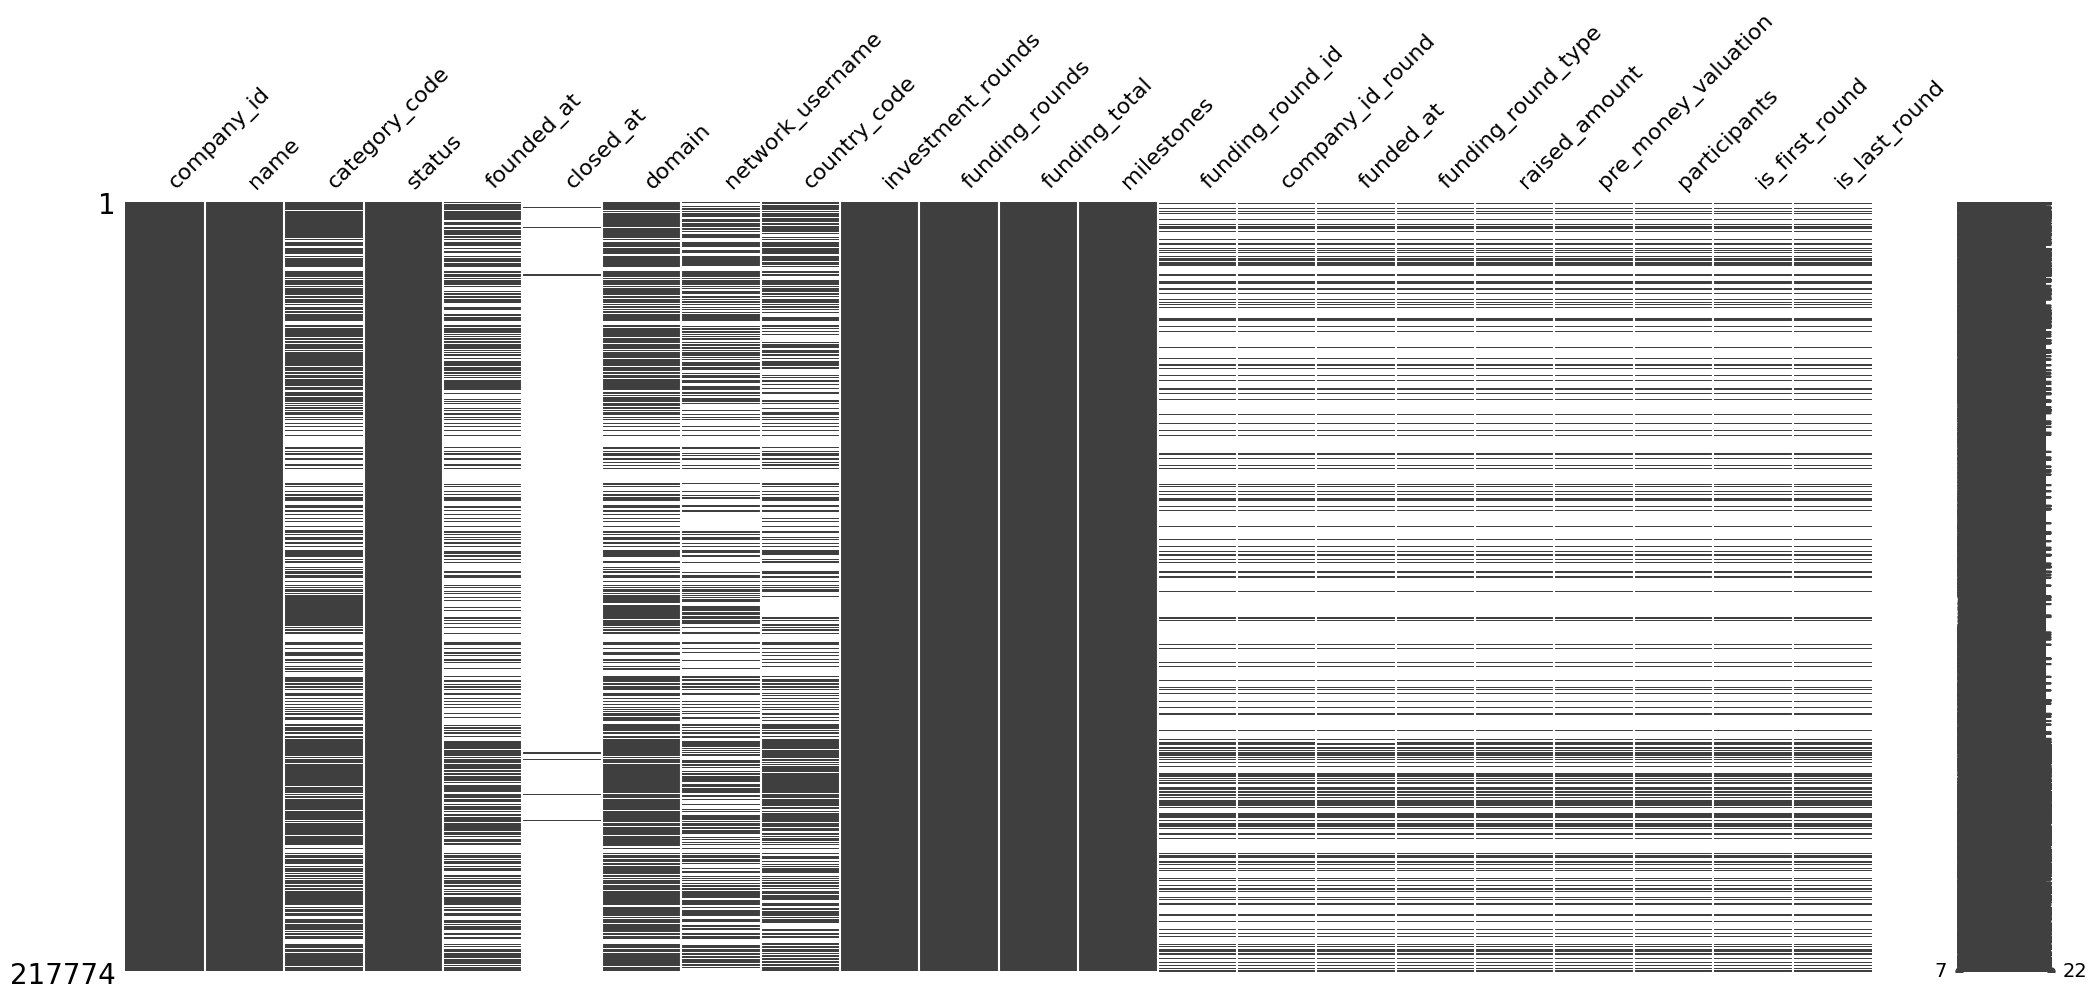

In [42]:
msno.matrix(startup_fin_df)

<Axes: >

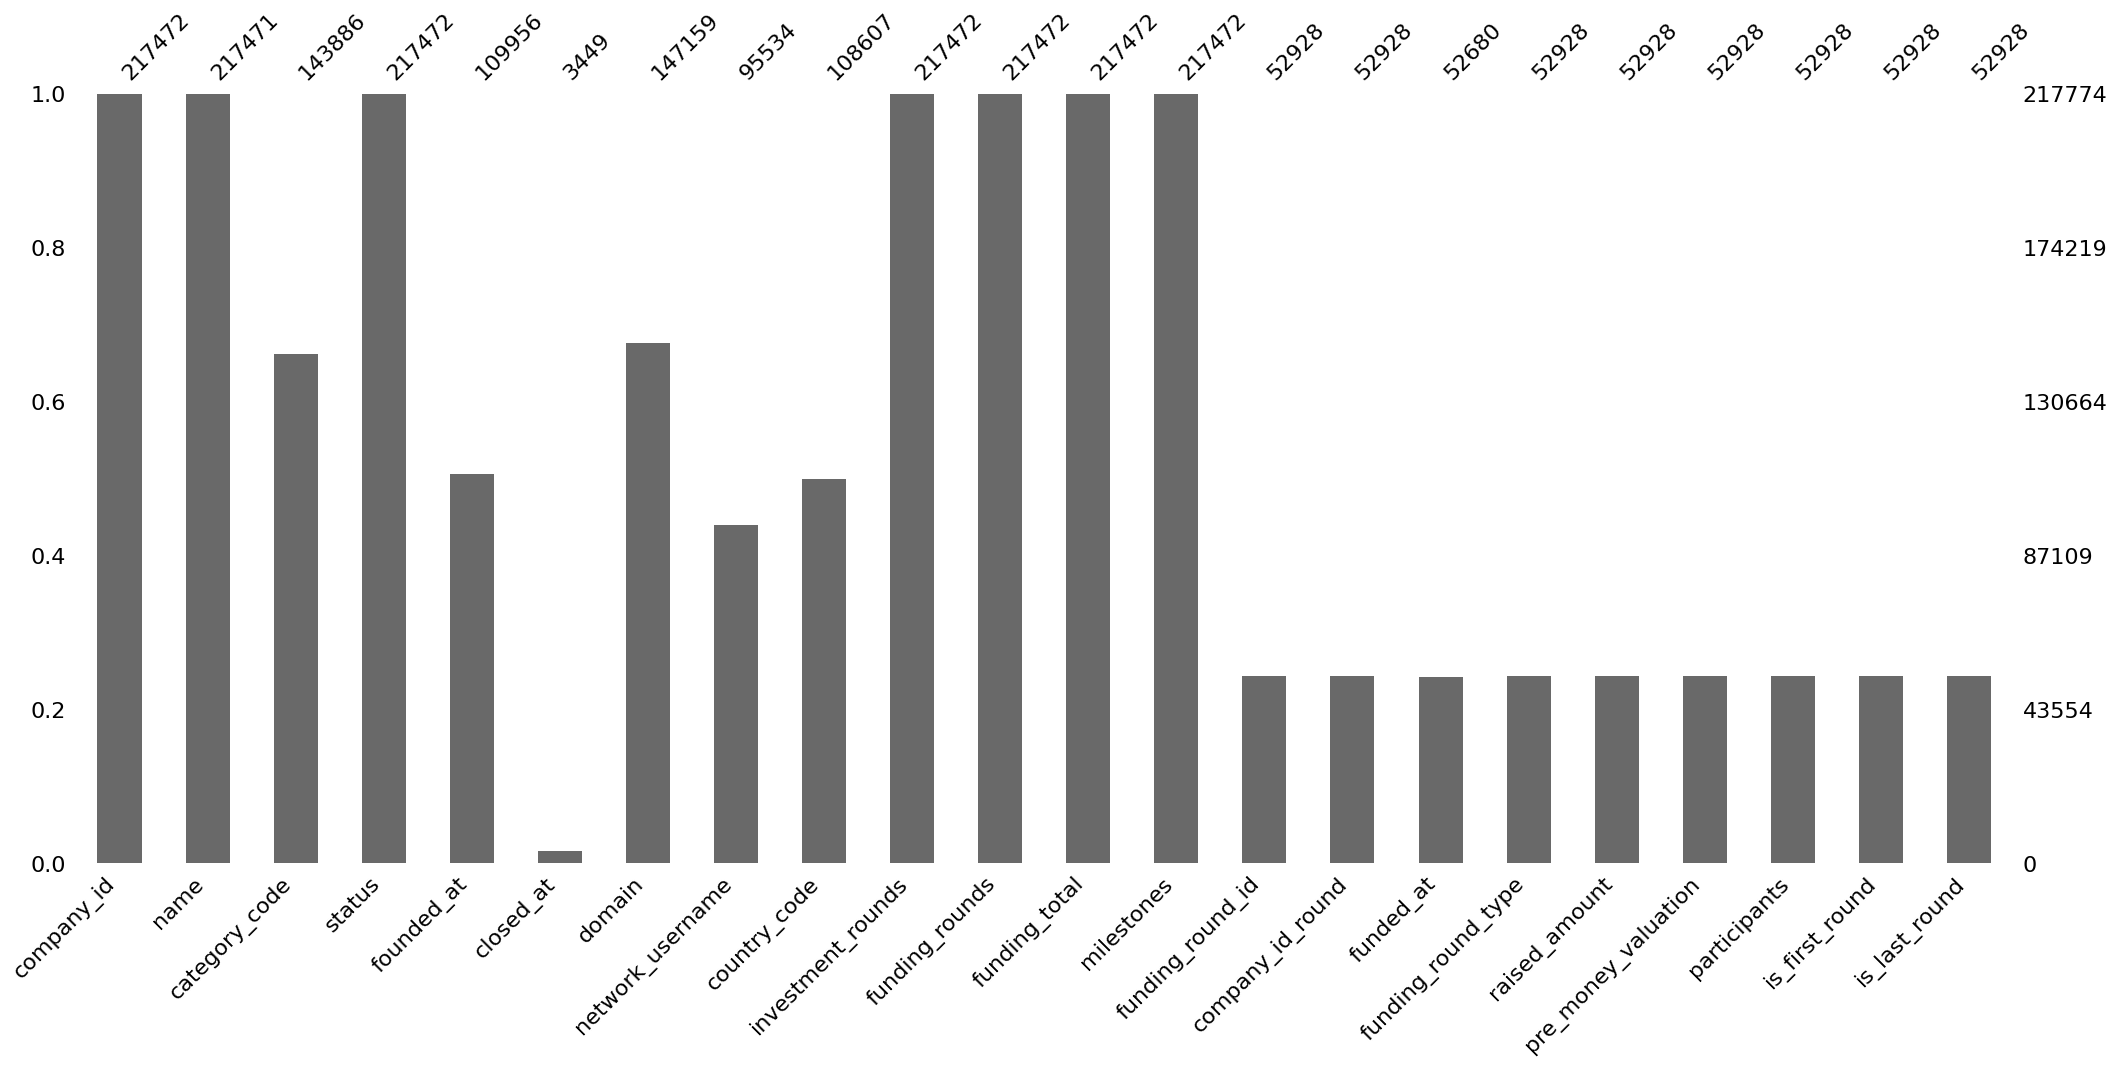

In [43]:
msno.bar(startup_fin_df)

<Axes: >

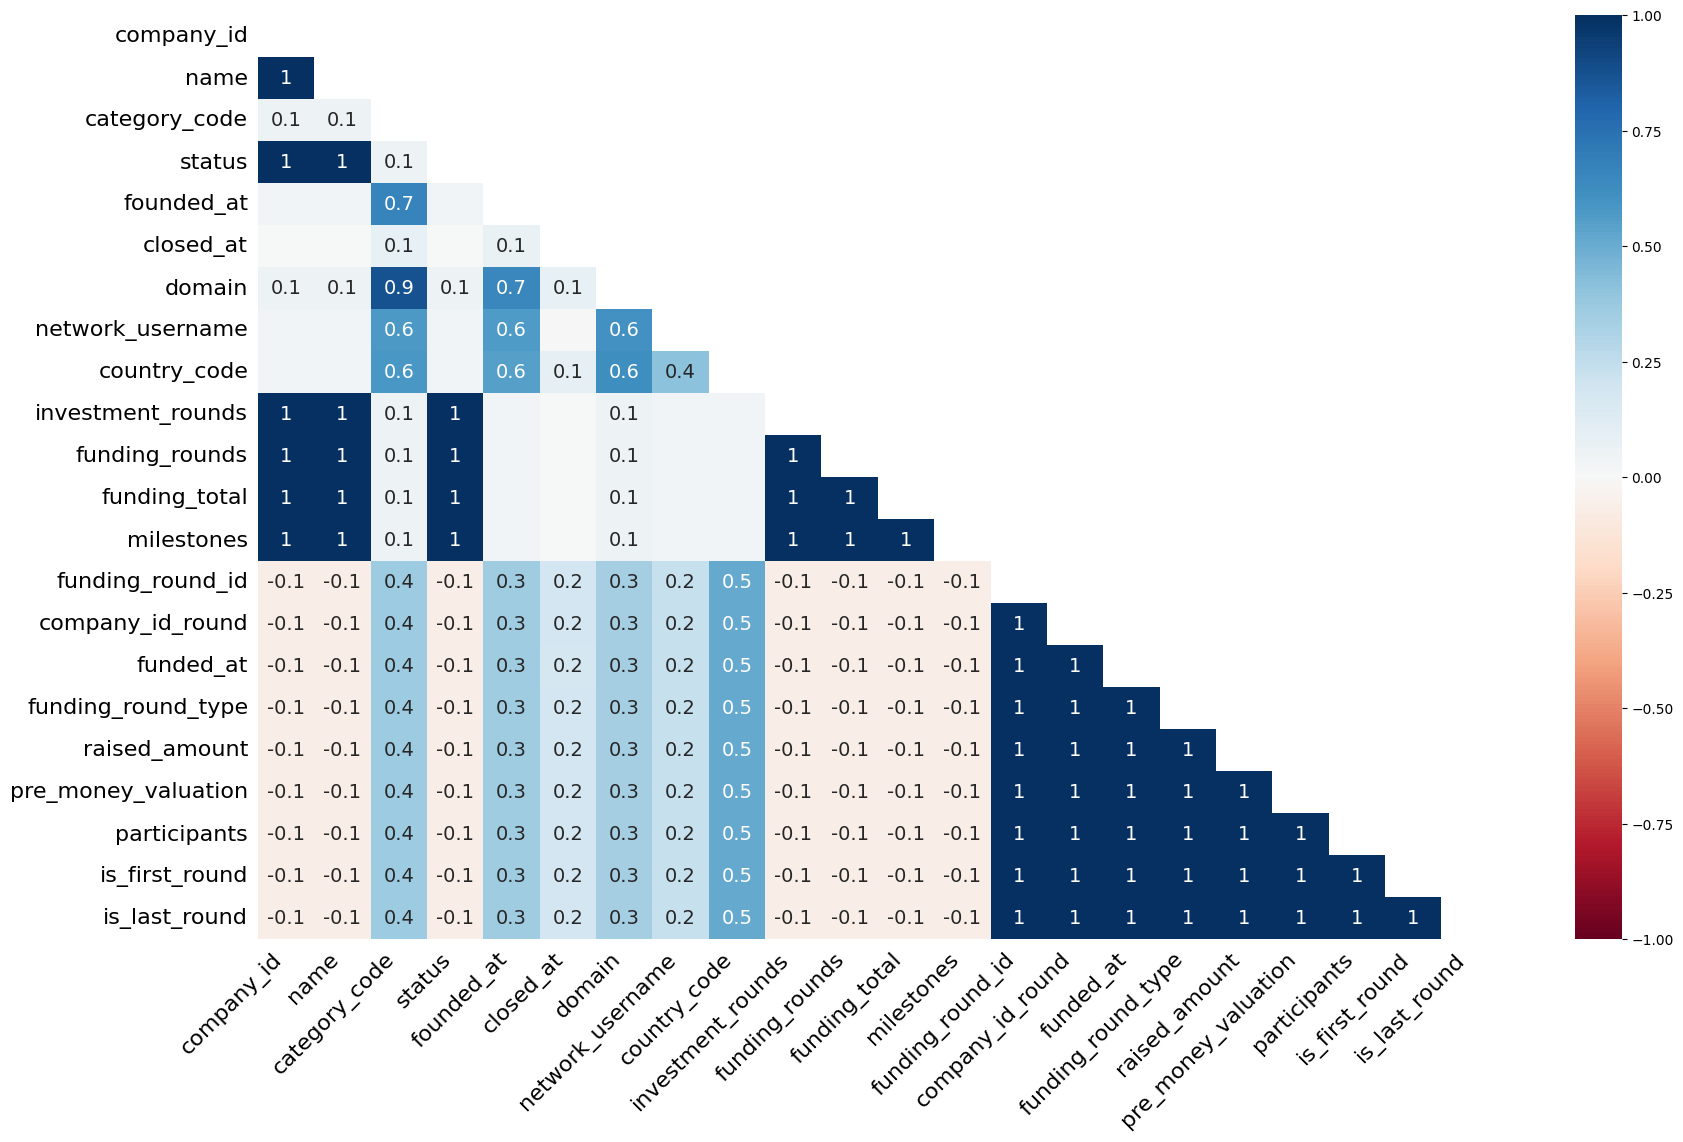

In [44]:
msno.heatmap(startup_fin_df)

In [45]:
missing = (pd.DataFrame({'Кол-во пропусков': startup_fin_df.isnull().sum(),
                        'Доля пропусков': startup_fin_df.isnull().sum() / len(startup_fin_df)})
          .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
company_id,302,0.001387
name,303,0.001391
category_code,73888,0.339288
status,302,0.001387
founded_at,107818,0.495091
closed_at,214325,0.984162
domain,70615,0.324258
network_username,122240,0.561316
country_code,109167,0.501286
investment_rounds,302,0.001387


Анализ пропусков в данных:

- минимальное количество пропусков наблюдается в `company_id` (0.14%), `name` (0.14%), `investment_rounds` (0.14%), `funding_rounds` (0.14%), `funding_total` (0.14%), `milestones` (0.14%), они столбцы имеют практически идентичное количество пропусков (302 записи), что может указывать на общую причину их возникновения;
- средняя степень пропусков в `category_code` (33.93%), `domain` (32.43%), `country_code` (50.13%), `network_username` (56.13%), `founded_at` (49.51%);
- максимальное число пропусков в `closed_at` (98.42%)

##### 2. Выборочное исследование по запросу компании-заказчика

    2.1 Раунды финансирования по годам

На основе датасета `startup_fin.csv` составим сводную таблицу по годам, в которой на основании суммы финансирования для каждого года указан типичный размер средств, выделенный за один раунд и общее количество таких раундов за год. Рассмотрим наиболее информативные года, где раундов было более 50.
По полученным данным визуализируем динамику "типичного размера средств", получаемых стартапами за один раунд

In [46]:
result = (
    startup_fin_df
    # извлекаем год из даты финансирования
    .assign(год=startup_fin_df['funded_at'].dt.year)
    # группируем данные по годам
    .groupby('год')
    # считаем медиану и количество раундов
    .agg(
        типичные_значения=('raised_amount', 'median'),  # сумма финансирования
        количество_раундов=('funding_rounds', 'count')  # количество раундов
    )
    # фильтруем годы с более чем 50 раундами
    .query('количество_раундов > 50')
    # сортируем результат по годам
    .sort_index()
)

# форматируем результат
result['типичные_значения'] = result['типичные_значения'].round(2)
result = result.rename(columns={
    'типичные_значения': 'типичные значения',
    'количество_раундов': 'количество раундов'
})

# переименовываем индекс и делаем его обычным столбцом
result = result.reset_index().rename(columns={'index': 'год'})

display(result[['год', 'типичные значения', 'количество раундов']])

,год,типичные значения,количество раундов
0,1999.0,2000000.0,76
1,2000.0,4200000.0,125
2,2001.0,3000000.0,95
3,2002.0,4200000.0,115
4,2003.0,3000000.0,154
5,2004.0,5000000.0,286
6,2005.0,5500000.0,1624
7,2006.0,5000000.0,2409
8,2007.0,3973320.0,3220
9,2008.0,3110000.0,3735


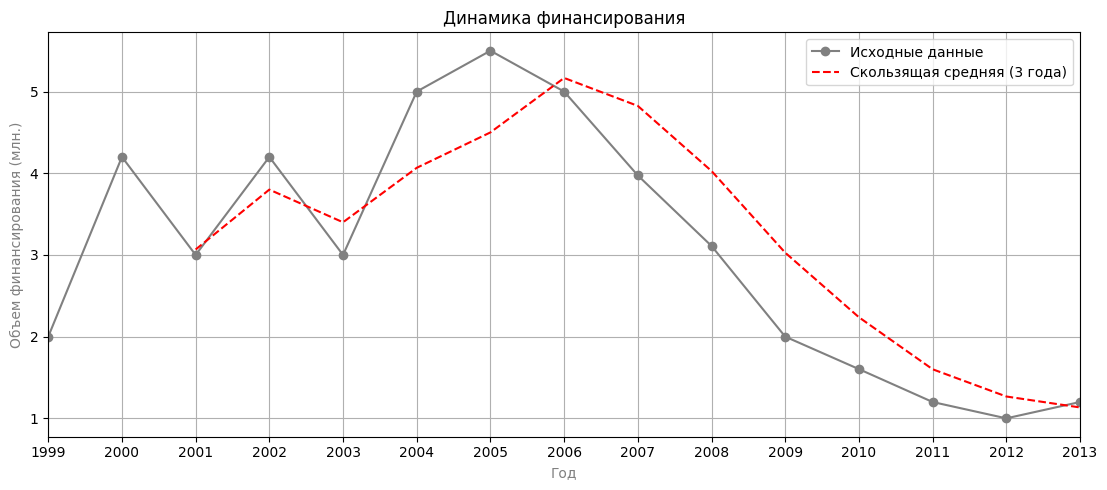

In [47]:
# дополним полученные данные скользящей средней за 3 года
result['скользящая_средняя'] = result['типичные значения'].rolling(window=3).mean() / 1000000

# размер графика
plt.figure(figsize=(11, 5))

# первый график - исходные данные
plt.plot(
    result['год'], # ось X
    result['типичные значения'] / 1000000, # ось Y: разделим на миллион, уйдя от коннотации
    marker='o', # маркер точки на графике
    linestyle='-', # стиль линии
    color='gray', # цвет
    label='Исходные данные'
)

# второй график - скользящая средняя
plt.plot(
    result['год'],
    result['скользящая_средняя'],
    linestyle='--',
    color='red',
    label='Скользящая средняя (3 года)'
)

# подпишем оси, добавим заголовок
plt.xlabel('Год', color='gray')
plt.ylabel('Объем финансирования (млн.)', color='gray')
plt.title('Динамика финансирования')

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xlim(1999,2013)
plt.xticks(result['год'])

plt.show()

Максимальный типичный размер собранных средств в рамках одного раунда наблюдался в 2005 году — 5,5 млн. единиц валюты. Это самое высокое значение среди всех представленных лет

Выделим тенденции по количеству раундов и выделяемых в рамках каждого из них средств в 2013 году:
- более 11 тыс. раундов — это максимальное значение за весь период наблюдения, количество раундов стабильно растёт;
- 1,2 млн. единиц валюты — это одно из самых низких значений (ниже только 2010–2012 годы);
- наблюдается явное снижение типичного размера средств в рамках одного раунда с 2008 по 2013 год (с 3,11 млн. до 1,20 млн. единиц валюты)

Сделаем предположение что, в 2013 году произошло смещение в сторону более частых, но менее крупных инвестиций

Обратим внимание, что для более корректного сравнения необходимо вводить коэффициент дефляции,  ведь покупательная способность валюты в 1999 и 2013 гг. разная

    2.2 Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например об образовании) от размера компаний, для этого оценим, насколько информация об образовании сотрудников полна в датасетах `employee_ed.csv` и `employee_profiles.csv`:

Для начала посчитаем распределение компаний по количеству сотрудников и визуализируем данные

In [48]:
# копии датафреймов
employee_ed_df = employee_ed_df.copy()
employee_profiles_df = employee_profiles_df.copy()

# так как при присоединении таблиц, могут возникнуть NaN, преобразуем типы данных необходимых нам столбцов
employee_ed_df['id'] = employee_ed_df['id'].astype('Int64')
employee_profiles_df['person_id'] = employee_profiles_df['person_id'].astype('Int64')

# убираем дубликаты
people_unique_df = employee_ed_df.drop_duplicates(subset='id')

merged_df = pd.merge(
    people_unique_df, 
    employee_profiles_df, 
    left_on='id', 
    right_on='person_id', 
    how='left',
    suffixes=('_people', '_education')
)

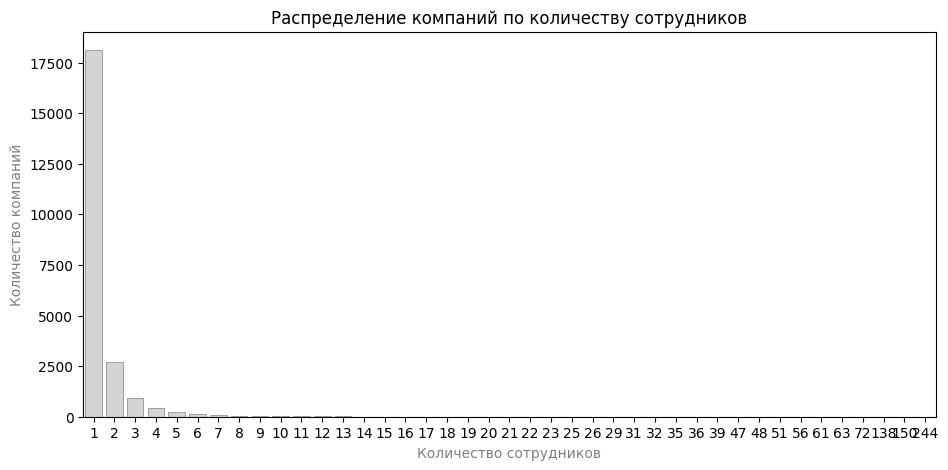

In [49]:
# анализ распределения компаний по количеству сотрудников
company_counts = merged_df.groupby('company_id')['id_people'].nunique().reset_index()

# визуализация распределения
plt.figure(figsize=(11, 5))

sns.countplot(x = company_counts['id_people'],
              color = 'lightgray',
              edgecolor='gray',
              linewidth=0.5)

plt.title('Распределение компаний по количеству сотрудников')
plt.xlabel('Количество сотрудников', color = 'gray')
plt.ylabel('Количество компаний', color = 'gray')

plt.show()

Затем выведем статистику по категориям компаний, разделив на бины (вручную заданные интервалы количества сотрудников)

In [50]:
# бины на основе анализа распределения
bins = [0, 1, 2, 3, 5, 10, 25, float('inf')]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']

# категоризация компаний
company_counts['категория_компании'] = pd.cut(
    company_counts['id_people'], 
    bins=bins, # список границ интервалов
    labels=labels, # список меток для категорий
    include_lowest=True # включая крайнее значение слева в первый интервал
)

# объединяем данные - присоединяем категории к основному датафрейму
grouped = pd.merge(
    company_counts[['company_id', 'категория_компании']], 
    merged_df,
    on='company_id'
)

# определим функцию для расчёта метрик по группе данных
def calculate_metrics(group):
    total = len(group) # считаем общее количество записей
    missing = group['institution'].isnull().sum() # количество пропусков в столбце 'institution'
    if total == 0:
        percentage = 0.0 # если таких записей нет, процент пропусков - 0
    else:
        percentage = (missing / total) * 100 # посчитаем процент пропусков по формуле - (число пропусков / общее число) * 100
    return pd.Series({ # вернем серией с тремя метриками
        'общее_количество_сотрудников': total,
        'пропуски_образования': missing,
        'процент_пропусков': percentage
    })

# группируем данные по категории компании и применяем функцию расчёта метрик
result = grouped.groupby('категория_компании', observed=False).apply(
    calculate_metrics, include_groups=False
).reset_index()

display(Markdown("**Статистика по категориям компаний в зависимости от заданных интервалов**"))
display(result)

**Статистика по категориям компаний в зависимости от заданных интервалов**

,категория_компании,общее_количество_сотрудников,пропуски_образования,процент_пропусков
0,1,23286.0,8389.0,36.025938
1,2,6922.0,2528.0,36.521237
2,3,3588.0,1348.0,37.569677
3,4-5,3804.0,1492.0,39.221872
4,6-10,3407.0,1422.0,41.737599
5,11-25,1950.0,651.0,33.384615
6,26+,1821.0,339.0,18.616145


In [51]:
display(Markdown("**Общая статистика по категориям компаний**"))
display(Markdown(f"Среднее количество сотрудников в компании: {company_counts['id_people'].mean():.2f}"))
display(Markdown(f"Максимальное количество сотрудников: {company_counts['id_people'].max()}"))

**Общая статистика по категориям компаний**

Среднее количество сотрудников в компании: 1.51

Максимальное количество сотрудников: 244

Дополнительно проверим возможность присоединения `employee_degrees_df` к уже подготовленному выше `merged_df`:

In [52]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267672 entries, 0 to 267671
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         267672 non-null  Int64         
 1   first_name        267663 non-null  string        
 2   last_name         267668 non-null  string        
 3   company_id        44778 non-null   float32       
 4   network_username  50761 non-null   string        
 5   id_education      109002 non-null  float64       
 6   person_id         109002 non-null  Int64         
 7   institution       109002 non-null  string        
 8   graduated_at      57656 non-null   datetime64[ns]
dtypes: Int64(2), datetime64[ns](1), float32(1), float64(1), string(4)
memory usage: 17.9 MB


In [53]:
employee_degrees_df['object_id'] = pd.to_numeric(employee_degrees_df['object_id'], errors='coerce').astype('Int64')

people_unique_df = employee_ed_df.drop_duplicates(subset='id')

merged_df = pd.merge(
    people_unique_df, 
    employee_profiles_df, 
    left_on='id', 
    right_on='person_id',
    how='left',
    suffixes=('_people', '_education') # для столбцов с одинаковыми именами добавим суффиксы
)

merged_df = pd.merge(
    merged_df,
    employee_degrees_df[['object_id', 'degree_type']],
    left_on='id_people',
    right_on='object_id',
    how='left'
)

merged_df = merged_df.drop(columns=['person_id', 'object_id'])

In [54]:
# проверяем условие: degree_type заполнен, а institution и id_education пустые
records = merged_df[
    (merged_df['degree_type'].notna()) &  # degree_type заполнен
    (merged_df['institution'].isna()) &   # institution пустое
    (merged_df['id_education'].isna())    # id_education пустое
]

display(Markdown(f" {len(records)} строки исключительно в датасете 'employee_degrees.csv', где сотрудники имеют степень об образовании"))

 32 строки исключительно в датасете 'employee_degrees.csv', где сотрудники имеют степень об образовании

In [55]:
if not records.empty:
    display(Markdown("**Примеры строк**"))
    display(records[['degree_type', 'institution', 'id_education']].head())
else:
    display(Markdown("**Строк нет**"))

**Примеры строк**

,degree_type,institution,id_education
11498,BS,<NA>,NaN
13331,MBA,<NA>,NaN
25232,BBA,<NA>,NaN
37032,MBA,<NA>,NaN
52021,BS,<NA>,NaN


Мы видим, что всего 32 сотрудника имеют степень об образовании, но об этом нет упоминаний в объединенном датафрейме `merged_df`. Добавлять такое небольшое количество данных в объединенный датасет нет смысла - присоединение `employee_degrees.csv` существенно не улучшит полноту информации об образовании сотрудников

In [56]:
missing_study = (pd.DataFrame({'Кол-во пропусков': merged_df.isnull().sum(),
                        'Доля пропусков': merged_df.isnull().sum() / len(merged_df)})
          .style.background_gradient(cmap='coolwarm'))
missing_study

,Кол-во пропусков,Доля пропусков
id_people,0,0.000000
first_name,9,0.000024
last_name,4,0.000011
company_id,299940,0.808941
network_username,289289,0.780215
id_education,158672,0.427940
institution,158672,0.427940
graduated_at,256851,0.692730
degree_type,180111,0.485761


На основе имеющихся данных невозможно сделать однозначный вывод о зависимости полноты информации от размера компании из-за неравномерного распределения компаний по размерам, маленького количества больших и крупных компаний:
- в небольших компаниях (до 10 сотрудников) наблюдается стабильно высокий уровень пропусков данных об образовании (36-41%);
- в крупных компаниях качество данных значительно выше;
- существует обратная зависимость между размером компании и процентом пропусков данных об образовании

    2.3 Поиск столбцов для объединения датасетов

В ходе предобработки данных, нам известно, что столбец `company_id` подходит для объединения с другими датасетами. Столбец `network_username`, который встречается в нескольких датасетах потенциально также может быть нам полезен, проверим:

In [57]:
# посмотрим какие датафреймы содержат этот столбец, воспользуемся ранее созданной функцией
check_column_existence('network_username')

['startup_fin_df', 'employee_ed_df']

In [58]:
# функция дублирования никнеймов
def analyze_network_usernames(company_df, employee_ed_df):
    # найдем общие никнеймы в таблицах и приведим к нижнему регистру
    company_usernames = (
        company_df['network_username']
        .dropna() 
        .str.lower()
    )
    
    people_usernames = (
        employee_ed_df['network_username']
        .dropna()
        .str.lower()
    )
    
    # общие никнеймы
    common_usernames = set(company_usernames).intersection(set(people_usernames))
    
    # результаты анализа
    unique_company = len(company_usernames.unique())
    unique_people = len(people_usernames.unique())
    common_count = len(common_usernames)
    
    display(Markdown(f"{unique_company} - уникальных никнеймов в компаниях "))
    display(Markdown(f"{unique_people} - уникальных никнеймов у людей "))
    display(Markdown(f"{common_count} - совпадений никнеймов"))
    
    return {
        'unique_company': unique_company,
        'unique_people': unique_people,
        'common_count': common_count,
        'common_usernames': common_usernames
    }

In [59]:
result = analyze_network_usernames(startup_fin_df, employee_ed_df)

79374 - уникальных никнеймов в компаниях 

38384 - уникальных никнеймов у людей 

2503 - совпадений никнеймов

Количество совпадающих значений 2,5 тыс. относительно общего числа уникальных никнеймов 117,8 тыс., что составляет примерно 2.13%

`network_username` датасета `employee_ed_df` относятся к сотрудникам, а для датасета `startup_fin_df` к компаниям (конечно, в теории есть случаи, когда компании названы в честь человека и тогда можно поймать пересечения, но в целом это не выглядит перспективно)

Использование столбца `network_username` для объединения данных не подойдет из-за риска получения некорректных результатов из-за возможного совпадения никнеймов компаний и людей

    2.4 Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `startup_fin.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Поэтому приведем данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний

In [60]:
startup_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float32       
 1   name                 217471 non-null  string        
 2   category_code        143886 non-null  category      
 3   status               217472 non-null  category      
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  string        
 7   network_username     95534 non-null   string        
 8   country_code         108607 non-null  category      
 9   investment_rounds    217472 non-null  Int64         
 10  funding_rounds       217472 non-null  Int64         
 11  funding_total        217472 non-null  float32       
 12  milestones           217472 non-null  Int64         
 13  funding_round_

Итак в датасете 217774 записи и 22 колонки, значительное количество пропусков в данных о раундах финансирования, некоторые колонки содержат дублирующую информацию (`company_id` и `company_id_round`), присутствуют временные метки (`founded_at`, `funded_at`)

Предположим, что изначально данные хранились в двух отдельных датасетах: компаний и раундов финансирования. При объединении таблиц возникла проблема с дублированием строк для компаний с несколькими раундами, это и привело к появлению пропусков в информации о компаниях в строках с разными раундами
Чтобы проще было оценить предположение, напишем функция для подсчета пропусков в процентном соотношении и прибегнем к ней после разделения:

In [61]:
# функция для подсчета пропусков в процентном соотношении
def missing_values_info(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum() / df.shape[0]) * 100
    return pd.DataFrame({'количество пропусков': total, 'процент пропусков': percent})

Разделим датасет `startup_fin.csv` на компании `company_df` и раунды финансирования `rounds_df`:

In [62]:
# создадим датафрейм компаний с полным набором столбцов
company_df = startup_fin_df[['company_id', 'name', 'category_code', 'status', 
                                    'founded_at', 'closed_at', 'domain', 'network_username',
                                    'country_code', 'investment_rounds', 'funding_rounds',
                                    'funding_total', 'milestones']]

# явно удалим столбец closed_at
company_df = company_df.drop(columns=['closed_at'])

# создадим датафрейм раундов
rounds_df = startup_fin_df[['company_id_round', 'funding_round_id', 
                                  'funded_at', 'funding_round_type', 
                                  'raised_amount', 'pre_money_valuation',
                                  'participants', 'is_first_round', 
                                  'is_last_round']]

# переименовываем столбец и сбрасываем индексы
rounds_df = rounds_df.rename(columns={'company_id_round': 'company_id'}).reset_index(drop=True)
company_df = company_df.reset_index(drop=True)

# удаляем все строки с пропусками в rounds_df
rounds_df = rounds_df.dropna()

In [63]:
# сделаем проверку для company_df
display(Markdown("**Пропущенные значения в company_df**"))
display(missing_values_info(company_df))

**Пропущенные значения в company_df**

,количество пропусков,процент пропусков
company_id,302,0.138676
name,303,0.139135
category_code,73888,33.928752
status,302,0.138676
founded_at,107818,49.509124
domain,70615,32.425818
network_username,122240,56.131586
country_code,109167,50.128574
investment_rounds,302,0.138676
funding_rounds,302,0.138676


In [64]:
# сделаем проверку для rounds_df после очистки
display(Markdown("**Пропущенные значения в rounds_df**"))
display(missing_values_info(rounds_df))

**Пропущенные значения в rounds_df**

,количество пропусков,процент пропусков
company_id,0,0.0
funding_round_id,0,0.0
funded_at,0,0.0
funding_round_type,0,0.0
raised_amount,0,0.0
pre_money_valuation,0,0.0
participants,0,0.0
is_first_round,0,0.0
is_last_round,0,0.0


В процессе убираем дубли по строкам и удаляем столбец о закрытии компаний (выполнено выше), который содержит 98% пропусков `company_df.drop(columns=['closed_at'])` (конкретно эти данные не интересуют заказчика в контексте исследования) 

In [65]:
# Удаление дубликатов из rounds_df
rounds_df = rounds_df.drop_duplicates(
    subset=[
        'company_id',
        'funding_round_id',
        'funded_at',
        'funding_round_type',
        'raised_amount',
        'pre_money_valuation',
        'participants',
        'is_first_round',
        'is_last_round'
    ],
    keep='first'
)

In [66]:
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52680 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           52680 non-null  float32       
 1   funding_round_id     52680 non-null  float32       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52680 non-null  category      
 4   raised_amount        52680 non-null  float32       
 5   pre_money_valuation  52680 non-null  float32       
 6   participants         52680 non-null  Int64         
 7   is_first_round       52680 non-null  Int64         
 8   is_last_round        52680 non-null  Int64         
dtypes: Int64(3), category(1), datetime64[ns](1), float32(4)
memory usage: 3.0 MB


In [67]:
company_df = company_df.drop_duplicates(
    subset=[
        'company_id',  
        'name',
        'category_code',
        'status',
        'founded_at',
        'domain',
        'network_username',
        'country_code',
        'investment_rounds',
        'funding_rounds',
        'funding_total',
        'milestones'
    ],
    keep='first'
)

In [68]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196554 entries, 0 to 217472
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float32       
 1   name               196552 non-null  string        
 2   category_code      123186 non-null  category      
 3   status             196553 non-null  category      
 4   founded_at         91227 non-null   datetime64[ns]
 5   domain             126545 non-null  string        
 6   network_username   80591 non-null   string        
 7   country_code       87990 non-null   category      
 8   investment_rounds  196553 non-null  Int64         
 9   funding_rounds     196553 non-null  Int64         
 10  funding_total      196553 non-null  float32       
 11  milestones         196553 non-null  Int64         
dtypes: Int64(3), category(3), datetime64[ns](1), float32(2), string(3)
memory usage: 14.8 MB



##### 3. Исследовательский анализ данных объединенного датасета

    3.1 Объединение данных

Итак, заказчика интересуют прежде всего те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании. В качестве основы используем данные из подготовленного датафрейма `company_df` (где `funding_rounds` > 0, `investment_rounds` > 0, `status` == `acquired`)

In [69]:
# условие фильтрации
condition = (
    (company_df['funding_rounds'] > 0) |  # условие 1
    (company_df['investment_rounds'] > 0) |  # условие 2
    (company_df['status'] == 'acquired')  # условие 3
)

filtered_company_df = company_df[condition]

# проверяем размер результата
display(Markdown(f"{len(filtered_company_df)} - количество строк подготовленной таблицы"))

40747 - количество строк подготовленной таблицы

In [70]:
filtered_company_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40747 entries, 0 to 217469
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  float32       
 1   name               40747 non-null  string        
 2   category_code      35315 non-null  category      
 3   status             40747 non-null  category      
 4   founded_at         27807 non-null  datetime64[ns]
 5   domain             35754 non-null  string        
 6   network_username   20850 non-null  string        
 7   country_code       34742 non-null  category      
 8   investment_rounds  40747 non-null  Int64         
 9   funding_rounds     40747 non-null  Int64         
 10  funding_total      40747 non-null  float32       
 11  milestones         40747 non-null  Int64         
dtypes: Int64(3), category(3), datetime64[ns](1), float32(2), string(3)
memory usage: 3.1 MB


Обращаю внимание, что далее работаем только с данными `filtered_company_df`

    3.2 Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям (визуально оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся)

In [71]:
# выведем описательную статистику
filtered_company_df['funding_total'].describe().to_frame()

,funding_total
count,4.074700e+04
mean,1.013561e+07
std,5.646436e+07
min,0.000000e+00
25%,0.000000e+00
50%,6.000000e+05
75%,5.650650e+06
max,5.700000e+09


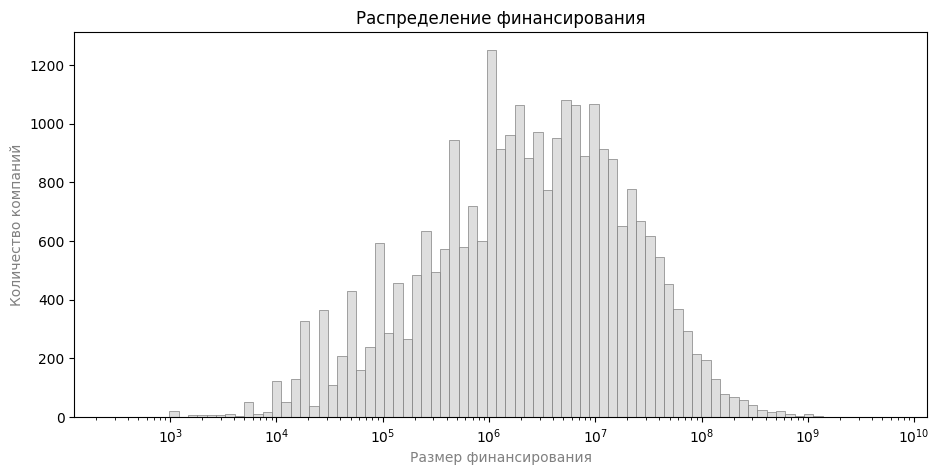

In [72]:
# размер графика
plt.figure(figsize=(11, 5))

# строим гиторграмму распределения 'funding_total'
sns.histplot(filtered_company_df['funding_total'],
             color = 'lightgray',
             edgecolor='gray',
             linewidth=0.5,
             log_scale=True) # ось X имеет логарифмический масштаб

plt.title('Распределение финансирования')
plt.xlabel('Размер финансирования', color='gray')
plt.ylabel('Количество компаний', color='gray')

plt.show()

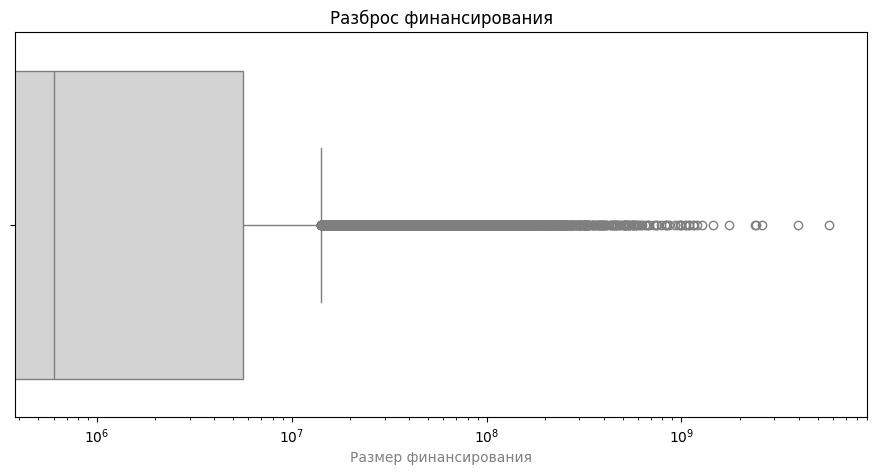

In [73]:
# размер графика
plt.figure(figsize=(11, 5))

# строим "ящик с усами"
sns.boxplot(x=filtered_company_df['funding_total'], color='lightgray')

plt.xscale('log') # установим логарифмический масштаб для оси X («сжимая» большие значения)
plt.title('Разброс финансирования')
plt.xlabel('Размер финансирования', color='gray')

plt.show()

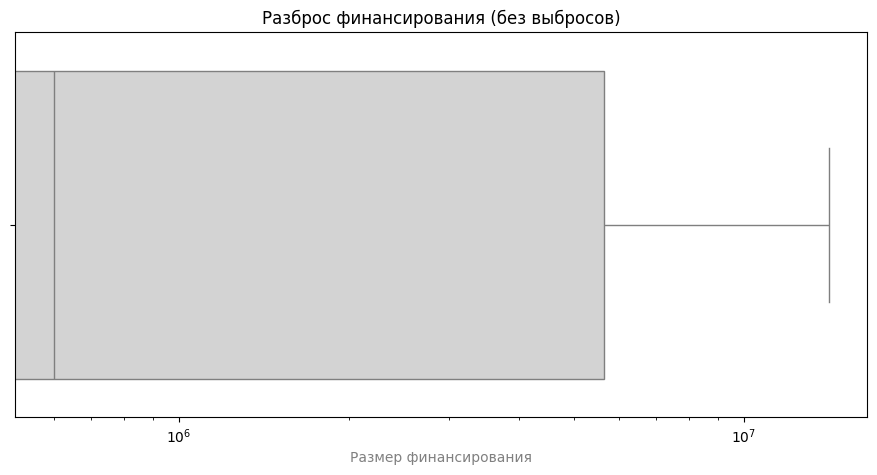

In [74]:
# размер графика
plt.figure(figsize=(11, 5))

# строим "ящик с усами"
sns.boxplot(x=filtered_company_df['funding_total'], 
            color='lightgray',
            showfliers=False, # отключаем выбросы
           )
             
plt.xscale('log') # установим логарифмический масштаб для оси X («сжимая» большие значения)

plt.title('Разброс финансирования (без выбросов)')
plt.xlabel('Размер финансирования', color='gray')

plt.show()

На основе статистических показателей обычным размером финансирования можно считать в диапазоне от 0,60 млн. до 5,65 млн. долларов (50-75 процентиль), медианное значение при этом составляет 0,6 млн. долларов (половина всех компаний). Среднее значение 10,1 млн. долларов искажено из-за большого разброса данных. Отметим, что у 25% компаний вовсе отсутствует финансирование. Среди прочего выделяется максимальное значение финансирования в 5,7 млрд. долларов

    3.3 Исследуем компании, проданные за символическую стоимость (1 доллар или бесплатно)

In [75]:
filtered_company_df.head()

,company_id,name,category_code,status,founded_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.0,5
3,10.0,Flektor,games_video,acquired,NaT,flektor.com,<NA>,USA,0,0,0.0,0
4,100.0,There,games_video,acquired,NaT,there.com,<NA>,USA,0,0,0.0,4
15,1001.0,FriendFeed,web,acquired,2007-10-01,friendfeed.com,friendfeed,USA,0,1,5000000.0,3
20,10014.0,Mobclix,mobile,acquired,2008-03-01,mobclix.com,mobclix,USA,0,1,0.0,4


In [76]:
startup_acq_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [77]:
filtered_company_df = filtered_company_df.copy()
startup_acq_df = startup_acq_df.copy()

# преобразуем типы данных столбцов для объединения, чтобы избежать ошибки
filtered_company_df['company_id'] = filtered_company_df['company_id'].astype('float64')
startup_acq_df['acquired_company_id'] = startup_acq_df['acquired_company_id'].astype('float64')

# присоединяем по 'acquired_company_id'
acquired_df = pd.merge(
    filtered_company_df,
    startup_acq_df,
    left_on='company_id',
    right_on='acquired_company_id',
    how='inner'
)

In [78]:
duplicate_count = acquired_df['company_id'].duplicated().sum()
display(Markdown(f"{duplicate_count} - дубликата ID компаний"))

143 - дубликата ID компаний

Причина возникновения 143 дубликатов компаний по `company_id` из-за продажи по частям - видно по разным датам покупки одной и той же компании

In [79]:
acquired_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            9390 non-null   float64       
 1   name                  9390 non-null   string        
 2   category_code         6573 non-null   category      
 3   status                9390 non-null   category      
 4   founded_at            4805 non-null   datetime64[ns]
 5   domain                7075 non-null   string        
 6   network_username      2544 non-null   string        
 7   country_code          6695 non-null   category      
 8   investment_rounds     9390 non-null   Int64         
 9   funding_rounds        9390 non-null   Int64         
 10  funding_total         9390 non-null   float32       
 11  milestones            9390 non-null   Int64         
 12  id                    9390 non-null   string        
 13  acquiring_company_

In [80]:
# ищем компании по условию - нулевые или минимальные сделки при ненулевом финансировании:
zero_deal_companies = acquired_df[(acquired_df['price_amount'] <= 1) & 
                                 (acquired_df['funding_total'] > 0)]

display(Markdown(f"{len(zero_deal_companies)} компаний, отвечают заданному условию"))

1618 компаний, отвечают заданному условию

Изучим верхнюю и нижнюю границу выбросов для столбца `funding_total`

In [81]:
# расчет квартилей и IQR
Q1 = zero_deal_companies['funding_total'].quantile(0.25)
Q3 = zero_deal_companies['funding_total'].quantile(0.75)
IQR = Q3 - Q1

# коэффициент для определения границ
k = 1.5

# границы с учетом неотрицательности
lower_bound = max(0, Q1 - k * IQR) 
upper_bound = Q3 + k * IQR

display(Markdown(f"""
**Границы выбросов сумм финансирования**<br>
нижняя граница - {lower_bound}  
верхняя граница - {upper_bound}  
25‑й процентиль - {Q1}  
75‑й процентиль - {Q3}
"""))


**Границы выбросов сумм финансирования**<br>
нижняя граница - 0  
верхняя граница - 35750000.0  
25‑й процентиль - 2000000.0  
75‑й процентиль - 15500000.0


In [82]:
# избавимся от нулевых значений
non_zero_funding = zero_deal_companies[zero_deal_companies['funding_total'] > 0]['funding_total']

# расчет квартилей и IQR
Q21 = non_zero_funding.quantile(0.25)
Q23 = non_zero_funding.quantile(0.75)
IQR = Q23 - Q21

# коэффициент для определения границ
k = 1.5

# границы с учетом неотрицательности
lower_bound_non_zero = max(0, Q21 - k * IQR) 
upper_bound_non_zero = Q23 + k * IQR

display(Markdown(f"""
**Границы выбросов сумм финансирования**<br>
нижняя граница - {lower_bound_non_zero}  
верхняя граница - {upper_bound_non_zero}  
25‑й процентиль - {Q21}  
75‑й процентиль - {Q23}
"""))


**Границы выбросов сумм финансирования**<br>
нижняя граница - 0  
верхняя граница - 35750000.0  
25‑й процентиль - 2000000.0  
75‑й процентиль - 15500000.0


In [83]:
zero_deal_companies['funding_total'].describe().to_frame()

,funding_total
count,1.618000e+03
mean,1.815296e+07
std,1.445030e+08
min,3.750000e+03
25%,2.000000e+06
50%,6.000000e+06
75%,1.550000e+07
max,5.700000e+09


In [84]:
# количество выбросов
outliers = zero_deal_companies[(zero_deal_companies['funding_total'] < lower_bound) | 
                      (zero_deal_companies['funding_total'] > upper_bound)]
display(Markdown(f"{len(outliers)} выбросов"))

147 выбросов

Выявлено 1618 компаний, проданных за 0 или 1 доллар и с учетом их финансирования. Средняя сумма финансирования таких компаний составляет 18,1 млн. долларов, стандартное отклонение — 144,5 млн. долларов (указывает на значительную вариативность сумм финансирования), а медианное значение - 6,0 млн. долларов. Минимальная финансируемая сумма 3,7 тыс. долларов - максимальная - 5,7 млрд. долларов

Распределение сумм финансирования имеет длинный правый хвост, о чем свидетельствует высокое стандартное отклонение, большая разница между медианой и максимальным значением - все говорит о значительном количестве выбросов в данных. Компании с нулевыми сделками демонстрируют широкий диапазон привлечения финансирования — от нескольких тысяч до миллиардов долларов, полученные границы выбросов позволяют выделить компании с нетипичными показателями финансирования для дальнейшего детального анализа причин таких сделок

    3.4 Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов с типично высокими ценами и с наибольшим разбросом цен за стартап

Что будем учитывать при выборе категорий:
- 90-й процентиль позволяет выделить топ самых высоких значений;
- минимальное количество наблюдений обеспечивает статистическую значимость результатов;
- двойной критерий (среднее + разброс) гарантирует, что мы отбираем именно те категории, которые привлекают крупные инвестиции и имеют значительный потенциал роста

Расчет по сумме сделки `price_amount` 

In [85]:
# присоединим датафрейм с нужным нам полем 'price amount', чтобы обладать большим объемом данных для анализа
filtered_company_df = filtered_company_df.copy()
startup_acq_df = startup_acq_df.copy()

filtered_company_df['company_id'] = filtered_company_df['company_id'].astype('float64')
startup_acq_df['acquired_company_id'] = startup_acq_df['acquired_company_id'].astype('float64')

acquired_df_left = pd.merge(
    filtered_company_df,
    startup_acq_df,
    left_on='company_id',
    right_on='acquired_company_id',
    how='left'
)

In [86]:
# обозначим границы для удаления выбросов в 'price_amount', чтобы не получать сумасшедших цифр при подсчете std
Q1 = acquired_df_left['price_amount'].quantile(0.25)
Q3 = acquired_df_left['price_amount'].quantile(0.75)
IQR = Q3 - Q1

k = 1.5  # коэффициент для определения выбросов

# значения вне этих пределов считаем выбросами
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

# оставляем только строки в пределах границ
acquired_df_left = acquired_df_left[
    (acquired_df_left['price_amount'] >= lower_bound) &
    (acquired_df_left['price_amount'] <= upper_bound)
]

In [87]:
# группируем данные
category_stats = acquired_df_left.groupby(
    'category_code', 
    observed=True # учитываем только наблюдаемые категории (без NaN) 
    ).agg({'price_amount': ['mean', 'std', 'count']})

# удаляем категории с нулевым количеством наблюдений
category_stats = category_stats[category_stats[('price_amount', 'count')] > 0]

# сортируем по среднему значению
top_categories = category_stats.sort_values(
    by=('price_amount', 'mean'), 
    ascending=False
)

# отбираем валидные категории по сложным условиям
valid_categories_price = top_categories[
    (top_categories[('price_amount', 'count')] > 10) & # условие - количество наблюдений > 10
    (top_categories[('price_amount', 'mean')] > np.percentile( # условие - среднее значение 'price_amount' выше 90‑го перцентиля среди всех средних
        top_categories[('price_amount', 'mean')].dropna(), 90 # исключаем NaN значения средних / вычисляем 90‑й перцентиль
    )) &
    (top_categories[('price_amount', 'std')] > np.percentile( # исключаем NaN значения std / вычисляем 90‑й перцентиль
        top_categories[('price_amount', 'std')].dropna(), 90
    ))
]

In [88]:
valid_categories_price

price_amount                   
                         mean          std count
category_code                                   
search             943.396226  6868.028197    53
network_hosting    592.857143  4707.099228   140
games_video        197.142857  3107.216834   259
public_relations   171.232877  2069.014722   146

Наиболее рискованные и доходные категории **search** и **network_hosting** выделяются сочетанием высоких средних цен и экстремального разброса -они подходят для крупных инвесторов, готовых к значительным колебаниям стоимости активов в погоне за сверхдоходами

Категория с максимальным объёмом сделок **games_video** предлагает широкий выбор стартапов при относительно низкой средней цене. Высокий разброс также требует детального анализа отдельных проектов, но даёт возможность найти «тёмных лошадок» с потенциалом роста

Наименее затратная категория **public_relations** может быть интересна инвесторам с консервативной стратегией. Несмотря на умеренный разброс, она сохраняет потенциал для роста стоимости отдельных активов

Для формирования сбалансированного портфеля целесообразно комбинировать категории. Например долю **search** и **network_hosting** для агрессивного роста, **games_video** для диверсификации, а **public_relations** для снижения общей волатильности

Расчет по суммам финансирования `funding_total`

In [89]:
# аналогичным образом выполним подход и для 'funding_total'
Q1 = filtered_company_df['funding_total'].quantile(0.25)
Q3 = filtered_company_df['funding_total'].quantile(0.75)
IQR = Q3 - Q1

k = 1.5  # коэффициент для определения выбросов

lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

filtered_company_df = filtered_company_df[
    (filtered_company_df['funding_total'] >= lower_bound) &
    (filtered_company_df['funding_total'] <= upper_bound)
]

In [90]:
# группируем данные
category_stats = filtered_company_df.groupby(
    'category_code', 
    observed=True
).agg({
    'funding_total': ['mean', 'std', 'count']
})

# сортируем по среднему финансированию
top_categories = category_stats.sort_values(
    by=('funding_total', 'mean'), 
    ascending=False
)

# фильтруем категории с достаточным количеством наблюдений
# количество наблюдений > 10 (чтобы исключить категории с малым количеством данных)
# среднее финансирование выше 90-го процентиля (отбираем только категории с действительно высокими средними вложениями)
# стандартное отклонение выше 90-го процентиля (учитываем только категории с большим разбросом цен)
valid_categories_total = top_categories[
    (top_categories[('funding_total', 'count')] > 10) &
    (top_categories[('funding_total', 'mean')] > np.percentile(
        top_categories[('funding_total', 'mean')], 90
    )) &
    (top_categories[('funding_total', 'std')] > np.percentile(
        top_categories[('funding_total', 'std')], 90
    ))
]

In [91]:
valid_categories_total

funding_total                    
                       mean           std count
category_code                                  
semiconductor    3834471.50  4.401281e+06   349
cleantech        3473995.75  3.993206e+06   754
medical          3464084.00  3.733473e+06   467
nanotech         3381493.50  3.874896e+06    40

Все анализируемые категории характеризуются многомиллионными средними чеками. Это указывает на принадлежность к капиталоёмким секторам, требующим значительных инвестиций

Максимальный разброс наблюдается в категориях **semiconductor**, **cleantech** - это создаёт как риски (возможность неудачных вложений), так и возможности (потенциал сверхдоходов от прорывных проектов)

Наиболее активная категория **cleantech** (лидирует по количеству сделок), что делает её привлекательной для инвесторов, ориентированных на диверсификацию портфеля в устойчивом развитии

Перспективная ниша с ограниченным числом проектов **nanotech** представляет интерес для венчурных фондов, готовых инвестировать в высокорисковые, но потенциально революционные технологии

    3.5 Количество раундов стартапа перед покупкой

Заказчика интересует типичное значение количества раундов `funding_rounds` для каждого возможного статуса стартапа

In [92]:
# Группировка данных и расчет средних значений
avg_rounds = (filtered_company_df
              .groupby('status', observed=False)  # все возможные категории
              ['funding_rounds']
              .mean()
              .round(2)
              .reset_index())

In [93]:
# переименуем статусы
avg_rounds['status'] = avg_rounds['status'].cat.rename_categories({
    'acquired': 'Приобретён',
    'closed': 'Закрыт',
    'ipo': 'Вышел на IPO',
    'operating': 'Действует'
})

In [94]:
avg_rounds

,status,funding_rounds
0,Приобретён,0.31
1,Закрыт,1.26
2,Вышел на IPO,0.92
3,Действует,1.28


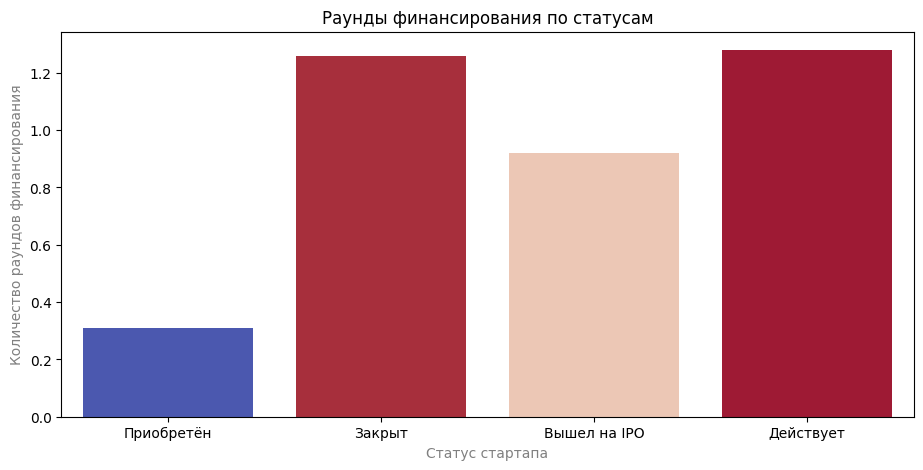

In [95]:
plt.figure(figsize=(11, 5))

sns.barplot(
    data=avg_rounds,
    x='status',
    y='funding_rounds',
    hue='funding_rounds',  # окрашиваем по признаку
    palette='coolwarm',
    legend=False  # отключим легенду
)

plt.title('Раунды финансирования по статусам')
plt.xlabel('Статус стартапа', color='gray') 
plt.ylabel('Количество раундов финансирования', color='gray') 

plt.show()

Первый раунд — критический фильтр: действующие стартапы при среднем значении 1,28 раунда нуждаются в дополнительном финансировании, при аналогичном среднем значении происходит и закрытие (после 1,26 раунда) 

Ранние сделки доминируют. Приобретение и закрытие чаще происходят до или после первого раунда, что подчёркивает критичность первых месяцев жизни стартапа, IPO не требует множества раундов, выход на биржу возможен даже после одного крупного привлечения

##### 4. Итоговый вывод и рекомендации

На основании проведенного анализа исторических данных о финансировании стартапов можно выделить ключевую тенденцию - в период с 1999 по 2013 гг. наблюдался устойчивый рост количества инвестиционных раундов при одновременном снижении среднего размера инвестиций в рамках одного раунда. Если в 2005 году типичный размер финансирования достигал 5,5 млн (максимум за весь период), то к 2013 году он сократился до 1,2 млн. При этом число раундов в 2013 году достигло рекордных 11042. Это свидетельствует о смещении фокуса инвесторов в сторону более частых, но менее капиталоемких вложений, что может быть связано с ростом числа ранних стартапов и снижением порога входа на рынок

Анализ связи между размером компании и полнотой данных об образовании сотрудников выявил закономерность - чем крупнее компания, тем ниже доля пропусков в информации об образовании. Так, в компаниях с 26+ сотрудниками процент пропусков составляет 18%. Это может указывать на более строгую кадровую политику в крупных организациях или на различия в подходах к сбору данных. Для инвестора это означает, что при оценке стартапов с небольшим штатом следует уделять повышенное внимание проверке квалификации команды

На основе анализа категорий стартапов по уровню риска и доходности можно сформулировать следующие рекомендации для формирования инвестиционного портфеля

Агрессивная стратегия предполагает фокусировку на категориях (например search и network_hosting), которые демонстрируют высокие средние цены сделок (943 тыс. и 593 тыс. соответственно) при экстремальном разбросе значений, что открывает потенциал для сверхдоходов

Для диверсификации стоит включать проекты из категории (games_video), где низкая средняя цена (197 тыс.) компенсируется большим выбором стартапов и возможностью обнаружить стоящую компанию

Консервативная же стратегия - рассматривать (к примеру такую категорию как public_relations), где умеренный разброс снижает волатильность

В капиталоёмких секторах приоритетными являются компании (например категории cleantech и semiconductor  со средним финансированием), которые сочетают масштабность и потенциал прорывных технологий. При этом важно учитывать, что 75% сделок закрываются в первые 1–2 раунда финансирования, что подчёркивает критичность ранней стадии развития стартапа для инвестиционной привлекательности

Рекомендации для финансовой компании заказавшей исследование:

- фокусироваться на быстрорастущих отраслях;
- учитывать тенденцию к множеству небольших раундов вместо крупных инвестиций;
- обращать внимание на стартапы с потенциалом быстрой продажи;
- предлагать гибкие условия с возможностью нескольких раундов;
- разрабатывать специальные условия для перспективных отраслей;
- учитывать высокую вариативность сумм финансирования;
- готовиться к работе с компаниями разного масштаба;
- обращать внимание на стартапы с потенциалом быстрого роста

##### Рынок стартапов демонстрирует тенденцию к дроблению инвестиций при сохранении высокого интереса к приобретению перспективных компаний. Наиболее привлекательными являются проекты в высокотехнологичных отраслях с потенциалом быстрого роста. Для финансовой компании важно разработать гибкую модель финансирования, учитывающую современные тенденции рынка и особенности развития стартапов